In [3]:
import json

In [4]:
results = json.load(open("/Users/vivekvajipey/Development/research/reasoning-distillation/results/aime_deepseek_qwen_14b_summ_base_sum_4iter/aime_deepseek_qwen_14b_summ_base_sum_4iter_20250504_173244/results.json"))

In [5]:
problem_index = 0
iteration_number = 0

In [6]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_summary'][-1]['total_token_usage']['completion_tokens']

269

In [7]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            total_tokens += tokens
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_tokens = total_tokens / count if count > 0 else 0
print(f"Average completion tokens per summary: {average_tokens:.2f}")

Average completion tokens per summary: 403.65


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_1793/1163655696.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


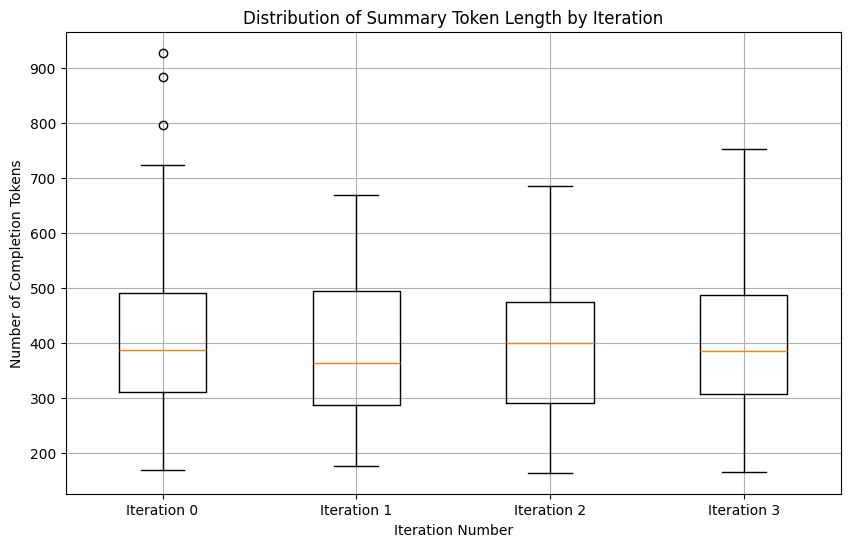

Average tokens for iteration 1: 418.33
Average tokens for iteration 2: 394.00
Average tokens for iteration 3: 400.20
Average tokens for iteration 4: 402.05


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title('Distribution of Summary Token Length by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Number of Completion Tokens')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i+1}: {avg:.2f}")

reasoning

In [9]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]['total_token_usage']['completion_tokens']

3827

In [10]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            total_tokens += tokens
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_tokens = total_tokens / count if count > 0 else 0
print(f"Average completion tokens per reasoning: {average_tokens:.2f}")

Average completion tokens per reasoning: 10353.71


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_1793/4061602342.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


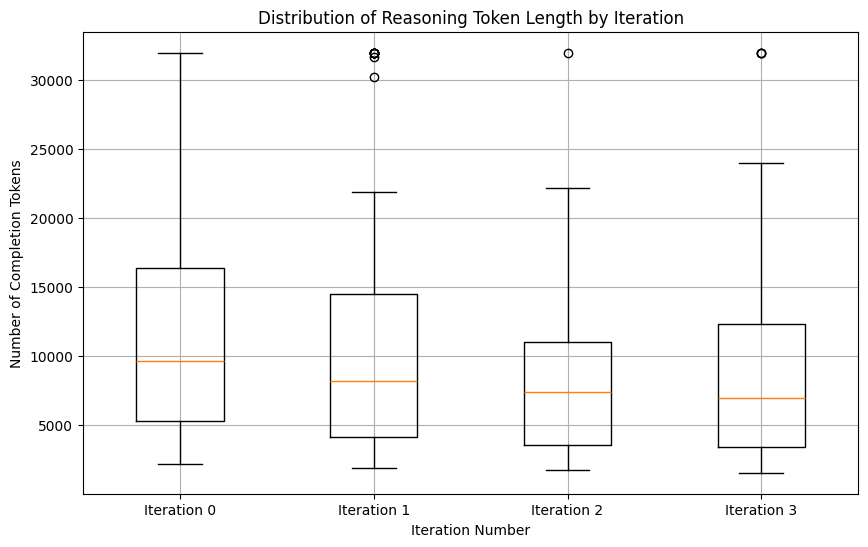

Average tokens for iteration 1: 12446.75
Average tokens for iteration 2: 11470.35
Average tokens for iteration 3: 8423.90
Average tokens for iteration 4: 9073.83


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title('Distribution of Reasoning Token Length by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Number of Completion Tokens')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i+1}: {avg:.2f}")

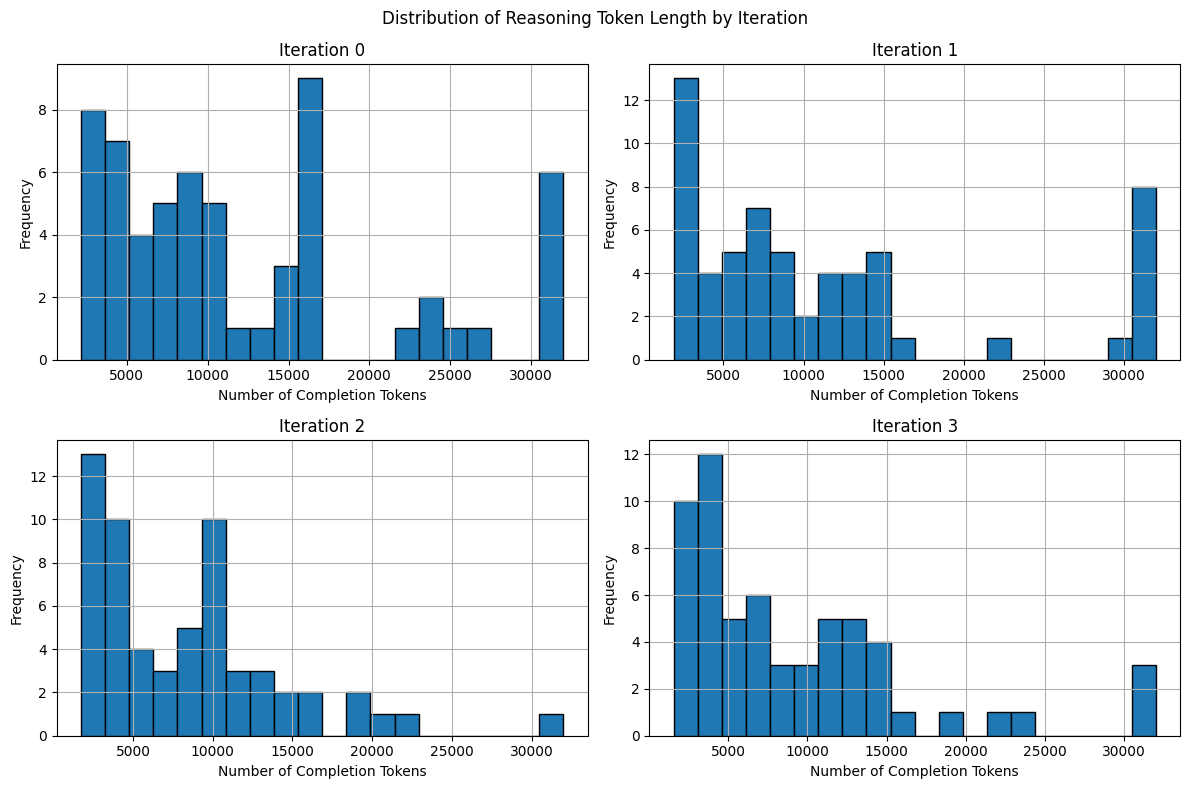

Average tokens for iteration 1: 12446.75
Average tokens for iteration 2: 11470.35
Average tokens for iteration 3: 8423.90
Average tokens for iteration 4: 9073.83


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create histogram subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Reasoning Token Length by Iteration')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].hist(iter_tokens[i], bins=20, edgecolor='black')
    axes[row, col].set_title(f'Iteration {i}')
    axes[row, col].set_xlabel('Number of Completion Tokens')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average tokens for iteration {i+1}: {avg:.2f}")

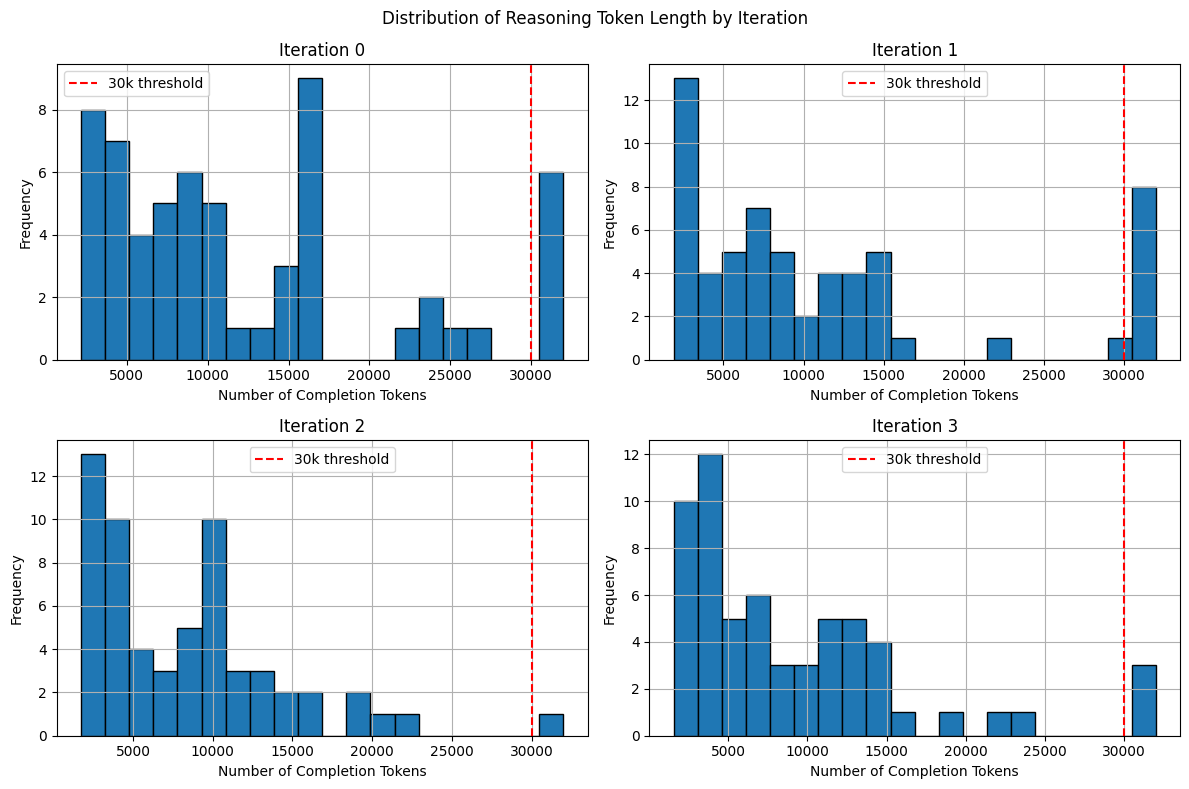

Iteration 1:
  Average tokens: 12446.75
  Cases over 30k: 6 out of 60 (10.0%)
Iteration 2:
  Average tokens: 11470.35
  Cases over 30k: 9 out of 60 (15.0%)
Iteration 3:
  Average tokens: 8423.90
  Cases over 30k: 1 out of 60 (1.7%)
Iteration 4:
  Average tokens: 9073.83
  Cases over 30k: 3 out of 60 (5.0%)


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

# Track counts of tokens exceeding 30k
over_30k_counts = {i: 0 for i in range(4)}
total_counts = {i: 0 for i in range(4)}

sus_30k = set()

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            iter_tokens[iter_num].append(tokens)
            total_counts[iter_num] += 1
            if tokens > 30000:
                over_30k_counts[iter_num] += 1
                sus_30k.add((problem_idx, iter_num))
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create histogram subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Reasoning Token Length by Iteration')

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].hist(iter_tokens[i], bins=20, edgecolor='black')
    axes[row, col].axvline(x=30000, color='r', linestyle='--', label='30k threshold')
    axes[row, col].set_title(f'Iteration {i}')
    axes[row, col].set_xlabel('Number of Completion Tokens')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# Print average and >30k stats for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    pct_over_30k = (over_30k_counts[i] / total_counts[i]) * 100 if total_counts[i] > 0 else 0
    print(f"Iteration {i+1}:")
    print(f"  Average tokens: {avg:.2f}")
    print(f"  Cases over 30k: {over_30k_counts[i]} out of {total_counts[i]} ({pct_over_30k:.1f}%)")

In [14]:
# Track counts of length vs stop finish reasons for each iteration
length_counts = {i: 0 for i in range(4)}
total_counts = {i: 0 for i in range(4)}

sus_fin_reason = set()

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            finish_reason = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['final_finish_reason']
            total_counts[iter_num] += 1
            if finish_reason == "length":
                print(f"finish reason length for problem {problem_idx}, iteration {iter_num}")
                sus_fin_reason.add((problem_idx, iter_num))
                length_counts[iter_num] += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Print stats for each iteration
for i in range(4):
    pct_length = (length_counts[i] / total_counts[i]) * 100 if total_counts[i] > 0 else 0
    print(f"Iteration {i+1}:")
    print(f"  Cases hitting length limit: {length_counts[i]} out of {total_counts[i]} ({pct_length:.1f}%)")

finish reason length for problem 3, iteration 0
finish reason length for problem 3, iteration 3
finish reason length for problem 4, iteration 0
finish reason length for problem 4, iteration 1
finish reason length for problem 5, iteration 0
finish reason length for problem 5, iteration 1
finish reason length for problem 6, iteration 0
finish reason length for problem 12, iteration 1
finish reason length for problem 15, iteration 1
finish reason length for problem 15, iteration 3
finish reason length for problem 16, iteration 0
finish reason length for problem 18, iteration 1
finish reason length for problem 24, iteration 1
finish reason length for problem 24, iteration 2
finish reason length for problem 27, iteration 1
finish reason length for problem 42, iteration 2
finish reason length for problem 43, iteration 1
finish reason length for problem 44, iteration 0
finish reason length for problem 49, iteration 0
finish reason length for problem 50, iteration 0
finish reason length for pr

In [15]:
results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]

{'num_api_calls': 1,
 'num_continuations': 0,
 'total_token_usage': {'prompt_tokens': 151,
  'completion_tokens': 3827,
  'total_tokens': 3978},
 'total_cost_info': {'prompt_cost': 7.55e-05,
  'completion_cost': 0.0019135,
  'total_cost': 0.001989},
 'total_text_length': 9285,
 'final_finish_reason': 'stop'}

In [16]:
len(sus_fin_reason), len(sus_30k)

(28, 19)

In [17]:
sus_fin_reason - sus_30k

{(3, 0),
 (4, 0),
 (5, 1),
 (6, 0),
 (24, 2),
 (27, 1),
 (42, 2),
 (44, 0),
 (49, 0),
 (52, 0),
 (54, 0),
 (55, 3)}

In [39]:
# from collections import Counter

# completion_tokens_counter = Counter()
# iteration_counter = Counter()
# problems_in_question = set()

# for problem_idx, iter_num in sus_fin_reason:
#     print(f"==== problem {problem_idx}, iteration {iter_num} ====")
#     problem_id = results["results"][problem_idx]["problem_id"]
#     print(f"problem id: {problem_id}")
#     print(results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1])
#     completion_tokens = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
#     completion_tokens_counter[completion_tokens] += 1
#     iteration_counter[iter_num] += 1

#     if completion_tokens < 30000:
#         problems_in_question.add((problem_id, iter_num))

#     print(f"completion tokens: {completion_tokens}")
#     print("="*100)

In [19]:
completion_tokens_counter

Counter({32000: 16, 8192: 7, 16384: 4, 24576: 1})

In [20]:
iteration_counter

Counter({0: 12, 1: 9, 3: 4, 2: 3})

In [21]:
problems_in_question

{('11', 0),
 ('12', 0),
 ('13', 1),
 ('14', 0),
 ('2024-I-5', 2),
 ('2024-I-8', 1),
 ('2024-II-8', 2),
 ('21', 0),
 ('26', 0),
 ('29', 0),
 ('4', 0),
 ('5', 3)}

In [37]:
"--question_ids=" + ",".join([pid for pid, iter_num in problems_in_question if pid != "14"])

'--question_ids=11,29,26,21,13,2024-I-5,4,2024-II-8,12,5,2024-I-8'

In [23]:
iter_0_bug_qs = set()

for problem_id, iter_num in problems_in_question:
    if iter_num == 0:
        print(problem_id)
        iter_0_bug_qs.add(problem_id)


11
29
26
21
4
14
12


In [24]:
improve_qs = {"11", "13", "2024-I-15", "2024-I-5", "2024-II-12", "2024-II-2", "22", "26", "9"}
len(improve_qs)

9

In [25]:
improve_qs & iter_0_bug_qs

{'11', '26'}

In [26]:
piq_iters_counter = Counter()
for problem_id, iter_num in problems_in_question:
    piq_iters_counter[iter_num] += 1
piq_iters_counter


Counter({0: 7, 1: 2, 2: 2, 3: 1})

In [27]:
for iter_num in range(4):
    print(f"Iteration {iter_num}: {piq_iters_counter[iter_num]} problems")


Iteration 0: 7 problems
Iteration 1: 2 problems
Iteration 2: 2 problems
Iteration 3: 1 problems


In [38]:
# results["results"][54]["detailed_metrics"][f'iteration_{0}_reasoning'][-1]
# results["results"][54]

compression rate

In [29]:
rzn_count = results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_reasoning'][-1]['total_token_usage']['completion_tokens']
sum_count = results["results"][problem_index]["detailed_metrics"][f'iteration_{iteration_number}_summary'][-1]['total_token_usage']['completion_tokens']
compression_rate = sum_count / rzn_count
print(f"Compression rate: {compression_rate:.2f}")

Compression rate: 0.07


In [30]:
total_tokens = 0
count = 0

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            rzn_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            sum_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            compression_rate = sum_count / rzn_count
            total_tokens += compression_rate
            count += 1
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

average_compression_rate = total_tokens / count if count > 0 else 0
print(f"Average compression rate: {average_compression_rate:.2f}")

Average compression rate: 0.07


/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_1793/652421588.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])


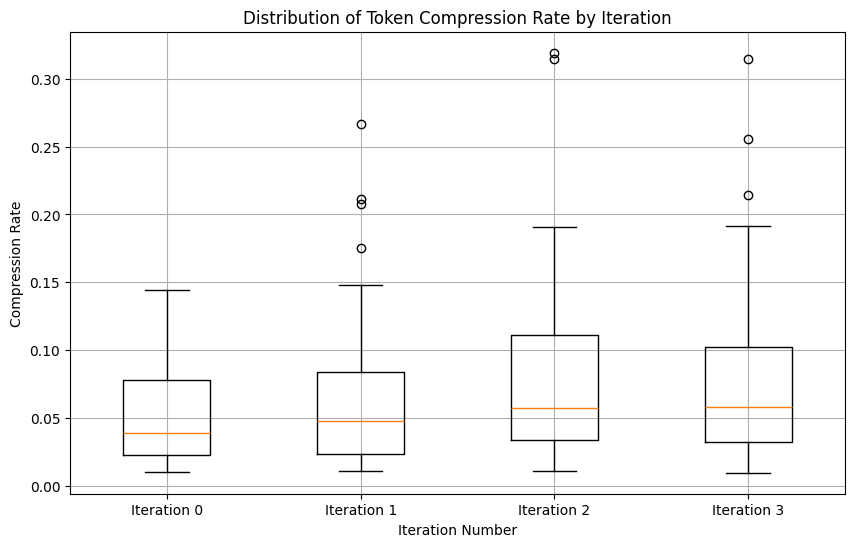

Average compression rate for iteration 1: 0.05
Average compression rate for iteration 2: 0.06
Average compression rate for iteration 3: 0.08
Average compression rate for iteration 4: 0.08


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store tokens for each iteration
iter_tokens = {i: [] for i in range(4)}

for problem_idx in range(len(results["results"])):
    for iter_num in range(4):
        try:
            rzn_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_reasoning'][-1]['total_token_usage']['completion_tokens']
            sum_count = results["results"][problem_idx]["detailed_metrics"][f'iteration_{iter_num}_summary'][-1]['total_token_usage']['completion_tokens']
            compression_rate = sum_count / rzn_count
            iter_tokens[iter_num].append(compression_rate)
        except:
            print(f"Error for problem {problem_idx} and iteration {iter_num}")
            continue

# Create box plot
plt.figure(figsize=(10, 6))
box_data = [iter_tokens[i] for i in range(4)]
plt.boxplot(box_data, labels=[f'Iteration {i}' for i in range(4)])
plt.title('Distribution of Token Compression Rate by Iteration')
plt.xlabel('Iteration Number') 
plt.ylabel('Compression Rate')
plt.grid(True)
plt.show()

# Print average for each iteration
for i in range(4):
    avg = np.mean(iter_tokens[i])
    print(f"Average compression rate for iteration {i+1}: {avg:.2f}")